<a href="https://colab.research.google.com/github/VishalTyagi09/My-first-Ml-Models/blob/master/Portfolio_With_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
assets =['FB','AMZN','AAPL','NFLX','GOOG']

In [ ]:
weights = np.array([0.2,0.2,0.2,0.2,0.2])

In [ ]:
stockstartdate = '2013-01-01'

In [ ]:
today = datetime.today().strftime('%Y-%m-%d')
today

'2020-06-27'

In [ ]:
df =pd.DataFrame()

for stock in assets:
  df[stock] = web.DataReader(stock,data_source='yahoo',start =stockstartdate,end= today)['Adj Close']

In [ ]:
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.502106,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.637436,13.798572,360.483826
2013-01-04,28.760000,259.149994,65.753418,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.366646,14.171429,366.003143
2013-01-08,29.059999,266.380005,65.542587,13.880000,365.280823
...,...,...,...,...,...
2020-06-22,239.220001,2713.820068,358.869995,468.040009,1451.859985
2020-06-23,242.240005,2764.409912,366.529999,466.260010,1464.410034
2020-06-24,234.020004,2734.399902,360.059998,457.850006,1431.969971


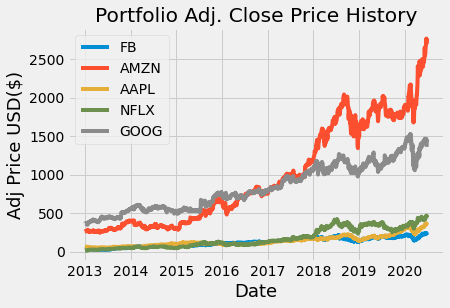

In [ ]:
title = 'Portfolio Adj. Close Price History'
my_stocks = df

for c in my_stocks.columns.values:
  plt.plot(my_stocks[c],label= c)

plt.title(title)
plt.xlabel('Date',fontsize =18)
plt.ylabel('Adj Price USD($)',fontsize = 18)
plt.legend(my_stocks.columns.values,loc ='upper left')
plt.show()

In [ ]:
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012623,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974
...,...,...,...,...,...
2020-06-22,0.001801,0.014508,0.026164,0.031561,0.014067
2020-06-23,0.012624,0.018642,0.021345,-0.003803,0.008644
2020-06-24,-0.033933,-0.010856,-0.017652,-0.018037,-0.022152


Text(0, 0.5, 'daily returns')

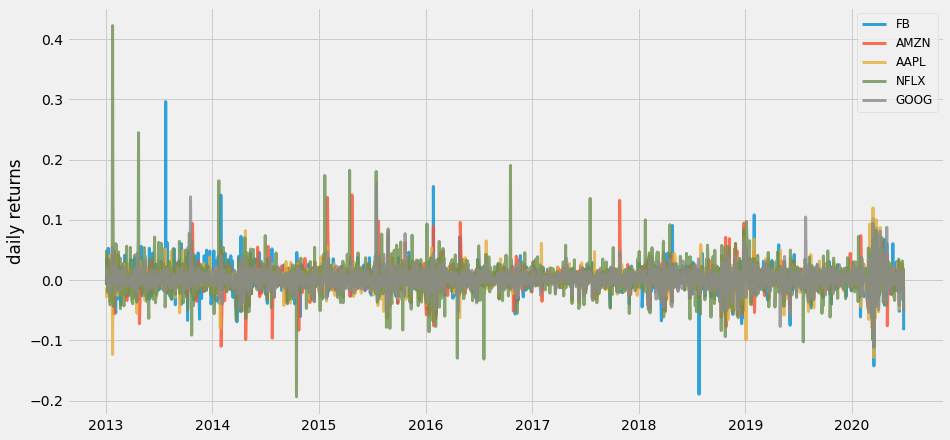

In [ ]:
plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

In [ ]:
cov_matrix_annual = returns.cov()*252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.116741,0.052025,0.041180,0.054317,0.049127
AMZN,0.052025,0.091363,0.035790,0.060988,0.046499
AAPL,0.041180,0.035790,0.076619,0.032069,0.037585
NFLX,0.054317,0.060988,0.032069,0.212105,0.048846
GOOG,0.049127,0.046499,0.037585,0.048846,0.065024


In [ ]:
  port_variance = np.dot(weights.T,np.dot(cov_matrix_annual,weights))
  port_variance

0.05914820000067728

In [ ]:
port_volatility= np.sqrt(port_variance)
port_volatility

0.24320402957327267

In [ ]:
portfolioSimpAnnReturn =np.sum(returns.mean()*weights)*252
portfolioSimpAnnReturn

0.3464258303327683

In [ ]:
percent_var = str(round(port_variance,2)*100) +'%'
percent_vols =str(round(port_volatility,2)*100) +'%'
percent_ret =str(round(portfolioSimpAnnReturn,2)*100) +'%'

print('Expected annual return:'+ percent_ret)
print('Annual Volatilty/Risk:'+ percent_vols)
print('Annual Variance:'+ percent_var)

Expected annual return:35.0%
Annual Volatilty/Risk:24.0%
Annual Variance:6.0%


In [ ]:
 pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 1.7MB/s 


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

ef = EfficientFrontier(mu,S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('FB', 0.12348), ('AMZN', 0.31479), ('AAPL', 0.22992), ('NFLX', 0.3318), ('GOOG', 0.0)])
Expected annual return: 40.4%
Annual volatility: 26.8%
Sharpe Ratio: 1.43


(0.403671586568928, 0.26811042898813575, 1.4310207477453476)

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation,get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights,latest_prices,total_portfolio_value = 15000)

allocation, leftover = da.lp_portfolio()
print('Discreet allocation :',allocation)
print('Funds remaining:${:.2f}'.format(leftover))

Discreet allocation : {'FB': 7.0, 'AMZN': 2.0, 'AAPL': 9.0, 'NFLX': 11.0}
Funds remaining:$41.63
